# Plotly.express
---

In [51]:
import plotly.express as px
import pandas as pd

In [53]:
d_df = pd.read_csv('diamonds.csv')

In [55]:
d_df

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

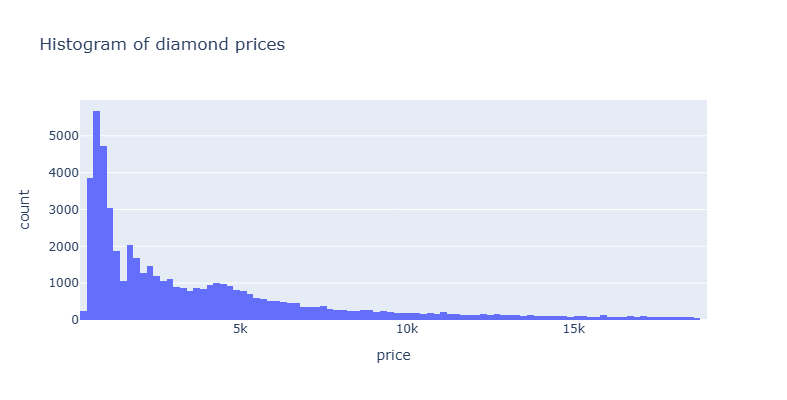

In [275]:
fig = px.histogram(
    d_df,
    x='price',
    title='Histogram of diamond prices',
    width=600,
    height=400
)

fig.show()

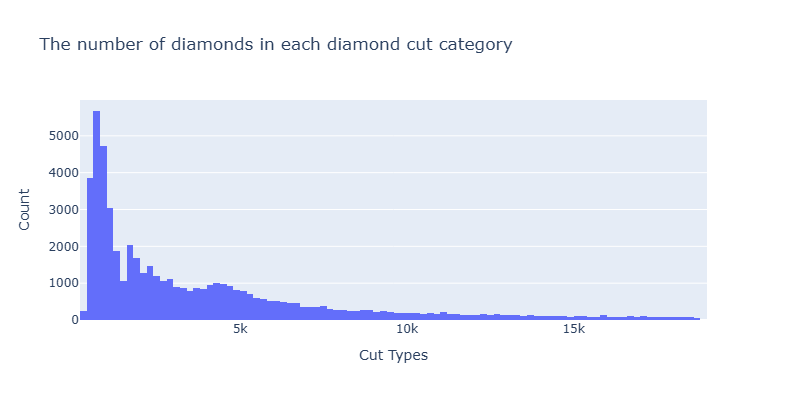

In [63]:
fig.update_layout(
    title='The number of diamonds in each diamond cut category',
    xaxis_title='Cut Types',
    yaxis_title='Count'
)
fig.show()

In [87]:
test = d_df.groupby('cut')['price'].mean()

In [89]:
print(test.head())

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64


In [71]:
mean_prices = (d_df.groupby('cut')['price'].mean().reset_index())

In [73]:
mean_prices

cut        price
0       Fair  4358.757764
1       Good  3928.864452
2      Ideal  3457.541970
3    Premium  4584.257704
4  Very Good  3981.759891

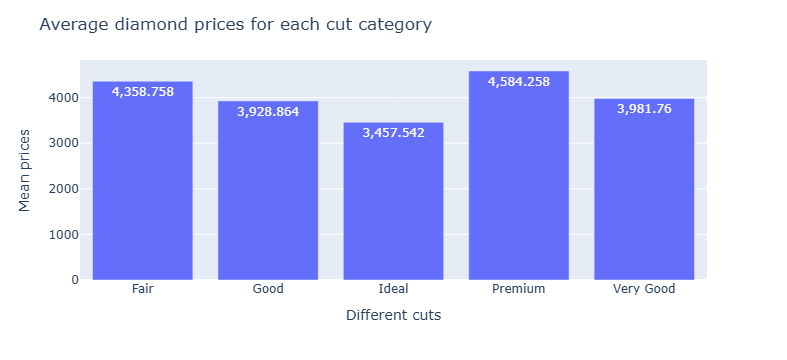

In [287]:
bar = px.bar(
    mean_prices,
    x='cut',
    y='price',
    text_auto= True
)

bar.update_layout(
    title='Average diamond prices for each cut category',
    xaxis_title = 'Different cuts',
    yaxis_title = 'Mean prices'
)

bar.show()

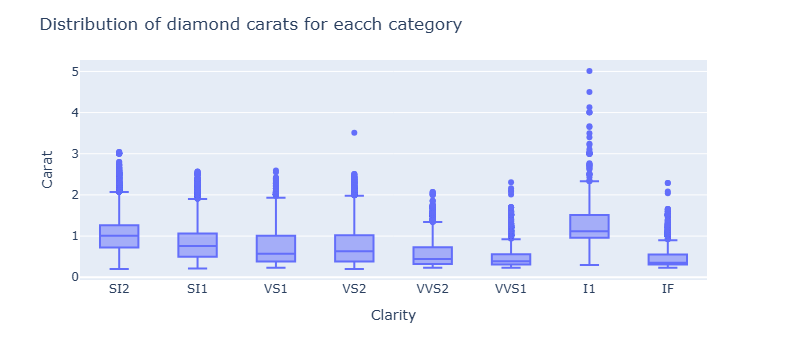

In [291]:
box = px.box(
    d_df,
    x='clarity',
    y='carat'
)

box.update_layout(
    title='Distribution of diamond carats for eacch category',
    xaxis_title='Clarity',
    yaxis_title='Carat'
)

box.show()

In [105]:
g_df = pd.read_csv('gapminder.csv')

In [109]:
t_df = pd.read_csv('tips.csv')

In [113]:
t_df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [107]:
g_df

Unnamed: 0             country  year  population      cont  life_exp  \
0            11         Afghanistan  2007    31889923      Asia    43.828   
1            23             Albania  2007     3600523    Europe    76.423   
2            35             Algeria  2007    33333216    Africa    72.301   
3            47              Angola  2007    12420476    Africa    42.731   
4            59           Argentina  2007    40301927  Americas    75.320   
..          ...                 ...   ...         ...       ...       ...   
137        1655             Vietnam  2007    85262356      Asia    74.249   
138        1667  West Bank and Gaza  2007     4018332      Asia    73.422   
139        1679         Yemen, Rep.  2007    22211743      Asia    62.698   
140        1691              Zambia  2007    11746035    Africa    42.384   
141        1703            Zimbabwe  2007    12311143    Africa    43.487   

          gdp_cap  
0      974.580338  
1     5937.029526  
2     6223.367465  
3     4797.231267  
4    12779.379640  
..            ...  
137   2441.576404  
138   3025.349798  
139   2280.769906  
140   1271.211593  
141    469.709298  

[142 rows x 7 columns]

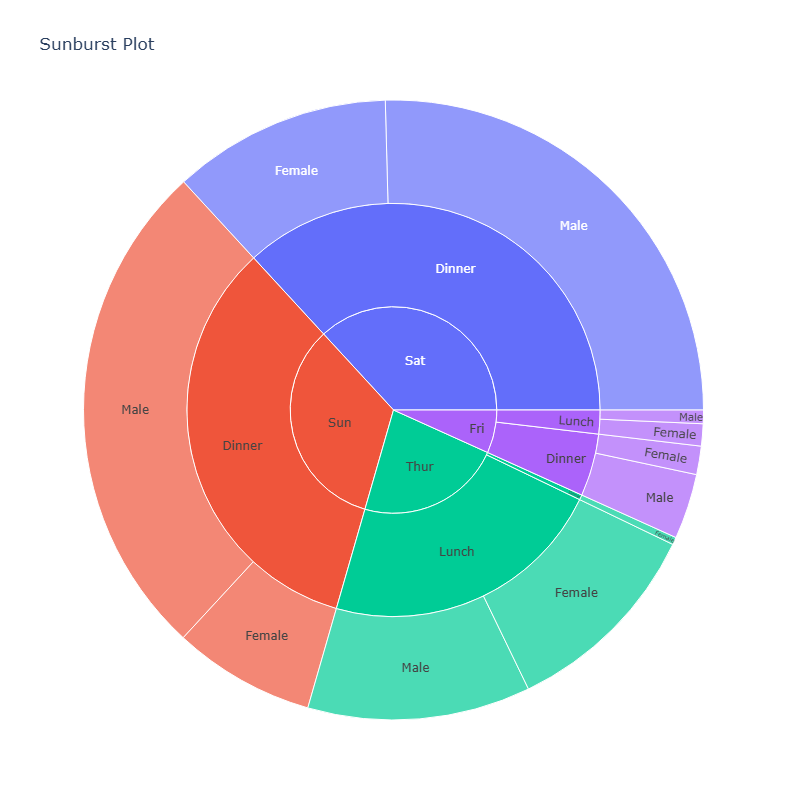

In [123]:
sunburst = px.sunburst(
    t_df,
    path=['day','time','sex'],
    values='total_bill',
    title='Sunburst Plot',
    width=800,
    height=800
)

sunburst.show()

In [131]:
import numpy as np

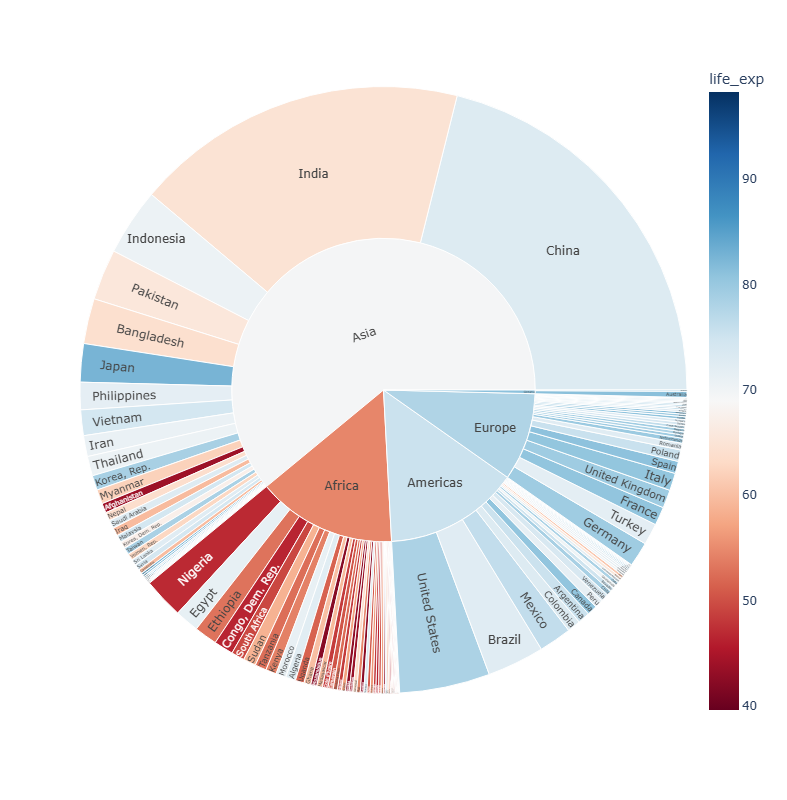

In [151]:
sb2 = px.sunburst(
    g_df,
    path = ['cont','country'],
    values='population',
    color='life_exp',
    hover_data = ['cont'],
    color_continuous_scale='RdBu',
    color_continuous_midpoint = np.average(g_df['life_exp'], weights = g_df['population']),
    width = 800,
    height=800
)

sb2.show()


In [153]:
vendors = ["A", "B", "C", "D", None, "E", "F", "G", "H", None]

sectors = ["Tech", "Tech", "Finance", "Finance", "Other", "Tech", "Tech", "Finance", "Finance", "Other"]

regions = ["North", "North", "North", "North", "North", "South", "South", "South", "South", "South"]

sales = [1, 3, 2, 4, 1, 2, 2, 1, 4, 1]

df = pd.DataFrame(
dict(vendors=vendors, sectors=sectors, regions=regions, sales=sales)
)

print(df)

  vendors  sectors regions  sales
0       A     Tech   North      1
1       B     Tech   North      3
2       C  Finance   North      2
3       D  Finance   North      4
4    None    Other   North      1
5       E     Tech   South      2
6       F     Tech   South      2
7       G  Finance   South      1
8       H  Finance   South      4
9    None    Other   South      1


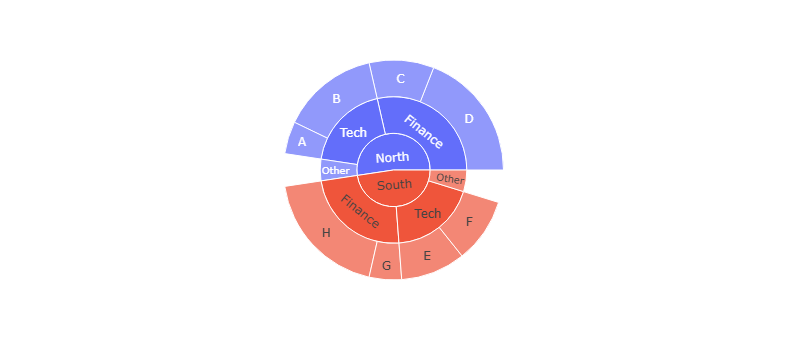

In [157]:
sb3 = px.sunburst(
    df,
    path = ['regions','sectors','vendors'],
    values = 'sales'
)

sb3.show()

In [167]:
g_df2 = g_df[(g_df.cont == 'Europe') & (g_df.year == 2007)]

In [169]:
g_df2

Unnamed: 0                 country  year  population    cont  life_exp  \
1            23                 Albania  2007     3600523  Europe    76.423   
6            83                 Austria  2007     8199783  Europe    79.829   
9           119                 Belgium  2007    10392226  Europe    79.441   
12          155  Bosnia and Herzegovina  2007     4552198  Europe    74.852   
15          191                Bulgaria  2007     7322858  Europe    73.005   
31          383                 Croatia  2007     4493312  Europe    75.748   
33          407          Czech Republic  2007    10228744  Europe    76.486   
34          419                 Denmark  2007     5468120  Europe    78.332   
43          527                 Finland  2007     5238460  Europe    79.313   
44          539                  France  2007    61083916  Europe    80.657   
47          575                 Germany  2007    82400996  Europe    79.406   
49          599                  Greece  2007    10706290  Europe    79.483   
56          683                 Hungary  2007     9956108  Europe    73.338   
57          695                 Iceland  2007      301931  Europe    81.757   
62          755                 Ireland  2007     4109086  Europe    78.885   
64          779                   Italy  2007    58147733  Europe    80.546   
84         1019              Montenegro  2007      684736  Europe    74.543   
90         1091             Netherlands  2007    16570613  Europe    79.762   
95         1151                  Norway  2007     4627926  Europe    80.196   
102        1235                  Poland  2007    38518241  Europe    75.563   
103        1247                Portugal  2007    10642836  Europe    78.098   
106        1283                 Romania  2007    22276056  Europe    72.476   
111        1343                  Serbia  2007    10150265  Europe    74.002   
114        1379         Slovak Republic  2007     5447502  Europe    74.663   
115        1391                Slovenia  2007     2009245  Europe    77.926   
118        1427                   Spain  2007    40448191  Europe    80.941   
122        1475                  Sweden  2007     9031088  Europe    80.884   
123        1487             Switzerland  2007     7554661  Europe    81.701   
131        1583                  Turkey  2007    71158647  Europe    71.777   
133        1607          United Kingdom  2007    60776238  Europe    79.425   

          gdp_cap  
1     5937.029526  
6    36126.492700  
9    33692.605080  
12    7446.298803  
15   10680.792820  
31   14619.222720  
33   22833.308510  
34   35278.418740  
43   33207.084400  
44   30470.016700  
47   32170.374420  
49   27538.411880  
56   18008.944440  
57   36180.789190  
62   40675.996350  
64   28569.719700  
84    9253.896111  
90   36797.933320  
95   49357.190170  
102  15389.924680  
103  20509.647770  
106  10808.475610  
111   9786.534714  
114  18678.314350  
115  25768.257590  
118  28821.063700  
122  33859.748350  
123  37506.419070  
131   8458.276384  
133  33203.261280

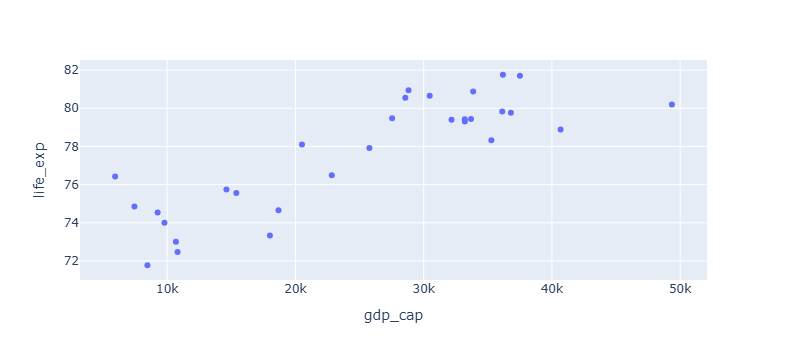

In [295]:
scatter = px.scatter(
    g_df2,
    x='gdp_cap',
    y='life_exp'
)

scatter.show()

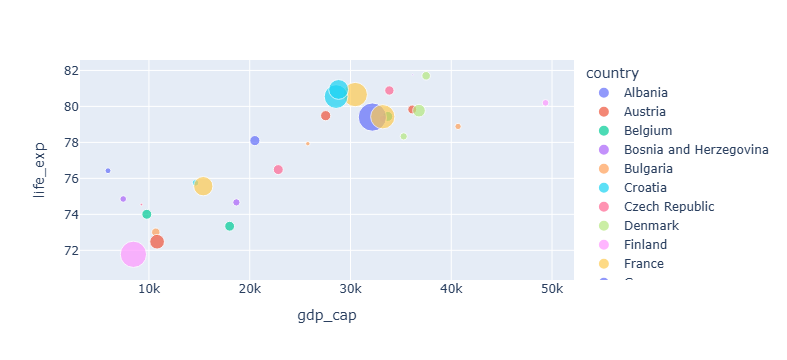

In [179]:
e_scatter = px.scatter(
    g_df2,
    x='gdp_cap',
    y='life_exp',
    size='population',
    color='country',
    hover_data='cont',
    hover_name='country'
)

e_scatter.show()

In [191]:
g_df3 = g_df[g_df.cont =='Europe']

In [193]:
g_df3

Unnamed: 0                 country  year  population    cont  life_exp  \
1            23                 Albania  2007     3600523  Europe    76.423   
6            83                 Austria  2007     8199783  Europe    79.829   
9           119                 Belgium  2007    10392226  Europe    79.441   
12          155  Bosnia and Herzegovina  2007     4552198  Europe    74.852   
15          191                Bulgaria  2007     7322858  Europe    73.005   
31          383                 Croatia  2007     4493312  Europe    75.748   
33          407          Czech Republic  2007    10228744  Europe    76.486   
34          419                 Denmark  2007     5468120  Europe    78.332   
43          527                 Finland  2007     5238460  Europe    79.313   
44          539                  France  2007    61083916  Europe    80.657   
47          575                 Germany  2007    82400996  Europe    79.406   
49          599                  Greece  2007    10706290  Europe    79.483   
56          683                 Hungary  2007     9956108  Europe    73.338   
57          695                 Iceland  2007      301931  Europe    81.757   
62          755                 Ireland  2007     4109086  Europe    78.885   
64          779                   Italy  2007    58147733  Europe    80.546   
84         1019              Montenegro  2007      684736  Europe    74.543   
90         1091             Netherlands  2007    16570613  Europe    79.762   
95         1151                  Norway  2007     4627926  Europe    80.196   
102        1235                  Poland  2007    38518241  Europe    75.563   
103        1247                Portugal  2007    10642836  Europe    78.098   
106        1283                 Romania  2007    22276056  Europe    72.476   
111        1343                  Serbia  2007    10150265  Europe    74.002   
114        1379         Slovak Republic  2007     5447502  Europe    74.663   
115        1391                Slovenia  2007     2009245  Europe    77.926   
118        1427                   Spain  2007    40448191  Europe    80.941   
122        1475                  Sweden  2007     9031088  Europe    80.884   
123        1487             Switzerland  2007     7554661  Europe    81.701   
131        1583                  Turkey  2007    71158647  Europe    71.777   
133        1607          United Kingdom  2007    60776238  Europe    79.425   

          gdp_cap  
1     5937.029526  
6    36126.492700  
9    33692.605080  
12    7446.298803  
15   10680.792820  
31   14619.222720  
33   22833.308510  
34   35278.418740  
43   33207.084400  
44   30470.016700  
47   32170.374420  
49   27538.411880  
56   18008.944440  
57   36180.789190  
62   40675.996350  
64   28569.719700  
84    9253.896111  
90   36797.933320  
95   49357.190170  
102  15389.924680  
103  20509.647770  
106  10808.475610  
111   9786.534714  
114  18678.314350  
115  25768.257590  
118  28821.063700  
122  33859.748350  
123  37506.419070  
131   8458.276384  
133  33203.261280

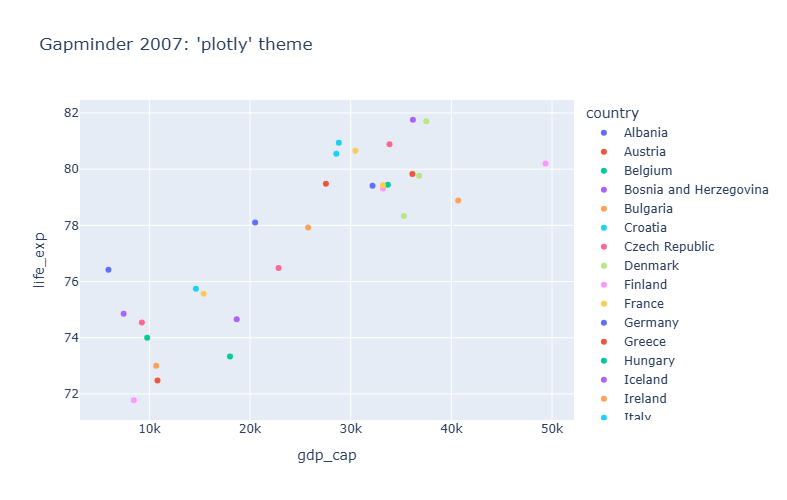

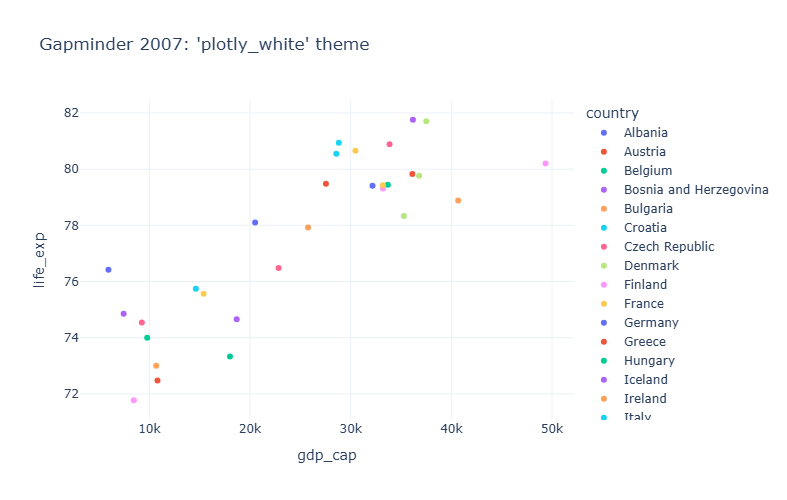

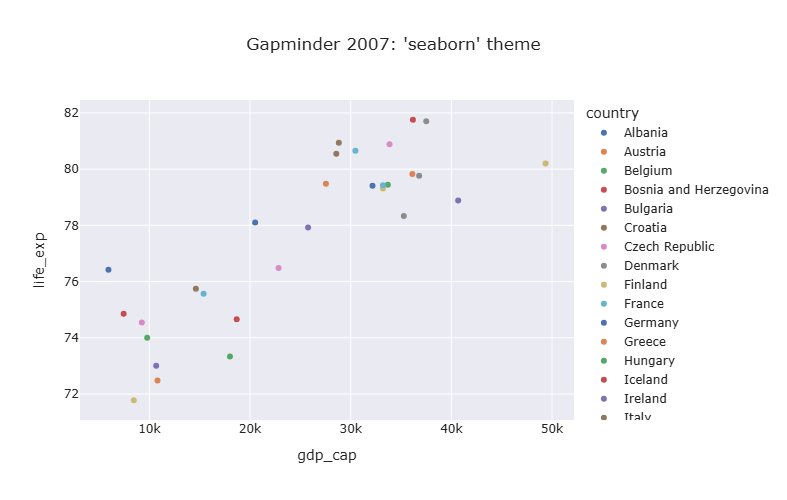

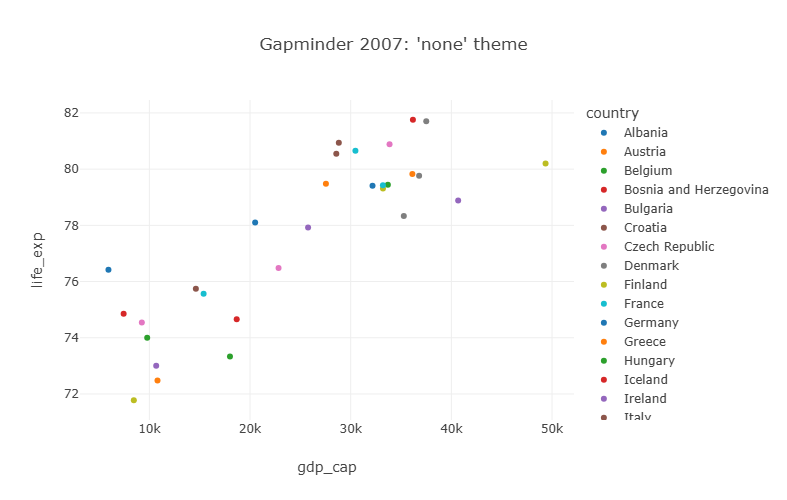

In [217]:
for template in ['plotly', 'plotly_white', 'seaborn', 'none']:
    e_scatter2 = px.scatter(
            g_df3,
            x='gdp_cap',
            y='life_exp',
            color='country',
            height=500,
            facet_row='...',
            facet_col='...',
            facet_col_wrap='...',
            template=template,
            title="Gapminder 2007: '%s' theme" %template
        )
    e_scatter2.show()
    

In [205]:
import plotly.io as pio

pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

---

In [220]:
revenue = pd.read_csv('revenue_data.csv')
revenue.head()

Rank                   Company   Revenue
0     1                   Walmart  523964.0
1     2             Sinopec Group  407009.0
2     3                State Grid  383906.0
3     4  China National Petroleum  379130.0
4     5         Royal Dutch Shell  352106.0

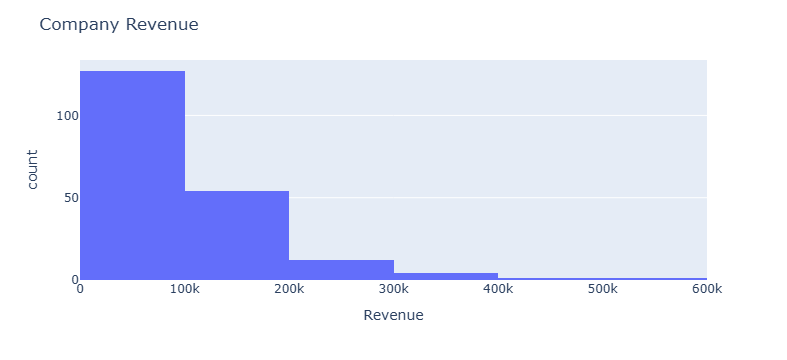

In [224]:
hist = px.histogram(
    revenue,
    x='Revenue',
    nbins=5
)

hist.update_layout(
    title='Company Revenue'
)
hist.show()

---

In [226]:
titanic = pd.read_csv('titanic-davi.csv')

In [228]:
titanic

pclass  survived                                               name  \
0        1         0                            Brady, Mr. John Bertram   
1        1         1               Barkworth, Mr. Algernon Henry Wilson   
2        1         1                                   Blank, Mr. Henry   
3        1         0                             Andrews, Mr. Thomas Jr   
4        1         0                                 Brandeis, Mr. Emil   
5        1         1                      Aubart, Mme. Leontine Pauline   
6        1         0                  Butt, Major. Archibald Willingham   
7        1         1          Brown, Mrs. James Joseph (Margaret Tobin)   
8        1         1                            Bishop, Mr. Dickinson H   
9        1         1            Bishop, Mrs. Dickinson H (Helen Walton)   
10       1         1                      Allen, Miss. Elisabeth Walton   
11       1         0                           Baxter, Mr. Quigg Edmond   
12       1         1    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
13       1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
14       1         0                            Artagaveytia, Mr. Ramon   
15       1         1                       Barber, Miss. Ellen 'Nellie'   
16       1         0                                Baumann, Mr. John D   
17       1         1                              Bidois, Miss. Rosalie   
18       1         0                                Birnbaum, Mr. Jakob   
19       1         1     Brown, Mrs. John Murray (Caroline Lane Lamson)   
20       1         1                           Bonnell, Miss. Elizabeth   
21       1         1                              Behr, Mr. Karl Howell   
22       1         1                     Allison, Master. Hudson Trevor   
23       1         0                       Allison, Miss. Helen Loraine   
24       1         0               Allison, Mr. Hudson Joshua Creighton   
25       1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
26       1         1          Bjornstrom-Steffansson, Mr. Mauritz Hakan   
27       1         0                               Beattie, Mr. Thomson   
28       1         0                             Astor, Col. John Jacob   
29       1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
30       1         1                            Bonnell, Miss. Caroline   
31       1         1                                  Bird, Miss. Ellen   
32       1         1                             Bissette, Miss. Amelia   
33       1         1                              Bazzani, Miss. Albina   
34       1         1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
35       1         0                           Borebank, Mr. John James   
36       1         1                      Beckwith, Mr. Richard Leonard   
37       1         1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
38       1         1                  Andrews, Miss. Kornelia Theodosia   
39       1         1                                Anderson, Mr. Harry   
40       1         1                  Calderhead, Mr. Edward Pennington   
41       1         1                        Bowerman, Miss. Elsie Edith   
42       1         1                    Burns, Miss. Elizabeth Margaret   
43       1         0                       Blackwell, Mr. Stephen Weart   
44       1         1                           Bowen, Miss. Grace Scott   
45       1         1      Bradley, Mr. George ('George Arthur Brayton')   
46       1         0                          Brewe, Dr. Arthur Jackson   
47       1         0                              Cairns, Mr. Alexander   
48       1         1   Candee, Mrs. Edward (Helen Churchill Hungerford)   

       sex  age  sibsp  parch    ticket      fare cabin embarked  
0     male   41      0      0    113054   30.5000   A21        S  
1     male   80      0      0     27042   30.0000   A23        S  
2     male   40      0      0    112277   31.0000   

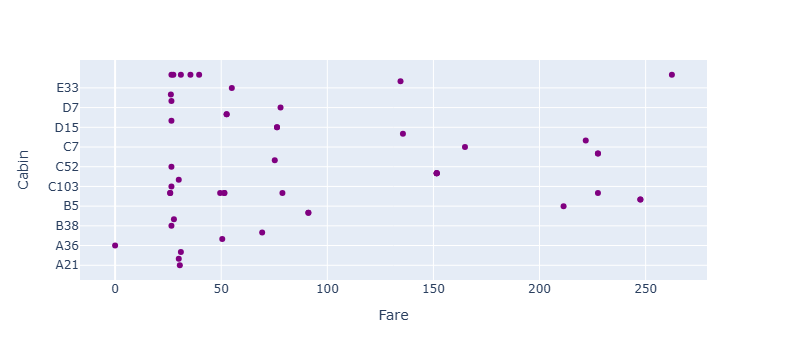

In [242]:
scatter = px.scatter(
    titanic,
    x='fare',
    y='cabin',
    color_discrete_sequence=['purple']  # Set point color to pink
)

scatter.update_layout(
    xaxis_title='Fare',
    yaxis_title='Cabin'
)

scatter.show()


---

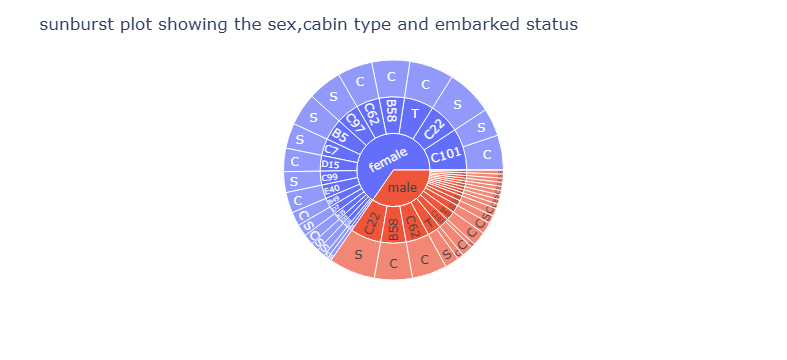

In [253]:
sunburst = px.sunburst(
    titanic,
    path=['sex','cabin','embarked'],
    values = 'fare'
)

sunburst.update_layout(
    title='sunburst plot showing the sex,cabin type and embarked status'
)

sunburst.show()

---

In [260]:
t_df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

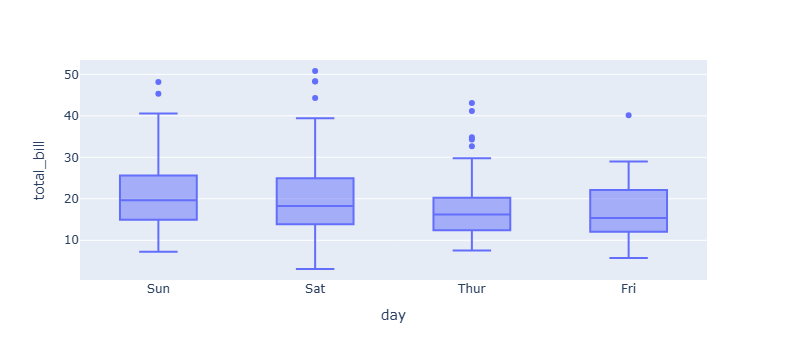

In [262]:
boxplot = px.box(
    t_df,
    x='day',
    y='total_bill'
)

boxplot.show()

---

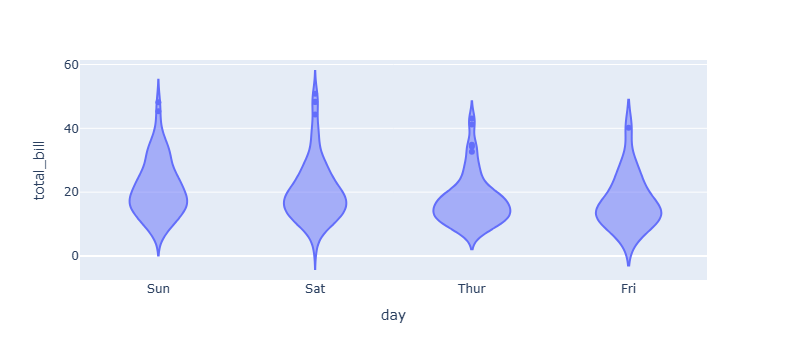

In [265]:
violin = px.violin(
    t_df,
    x='day',
    y='total_bill'
)

violin.show()